In [28]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [29]:
all_df = pd.read_csv("star.csv")

In [30]:
all_df[:5]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [31]:
X=all_df.drop(['target_class'], axis=1).values.astype('float64')

In [32]:
Y = all_df['target_class'].values.astype('int64')

In [33]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

14318

In [34]:
X.shape

(17898, 8)

In [35]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [36]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
model = Sequential()

In [39]:
model.add(Conv1D(filters=24*4,
                 kernel_size=1,
                 input_shape=(8,1),
                 padding='valid',
                 activation='relu'))

In [40]:
model.add(MaxPooling1D(pool_size=1))

In [41]:
model.add(Conv1D(filters=24*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [42]:
model.add(MaxPooling1D(pool_size=1))

In [43]:
model.add(Conv1D(filters=24*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [44]:
model.add(MaxPooling1D(pool_size=1))

In [45]:
model.add(Conv1D(filters=24,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [46]:
model.add(MaxPooling1D(pool_size=1))

In [47]:
model.add(Flatten())

In [48]:
model.add(Dense(8, activation='tanh'))

In [49]:
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 8, 96)             192       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 8, 96)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 8, 72)             6984      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 8, 72)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 48)             3504      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 8, 48)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 8, 24)             1176      
__________

In [51]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [52]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 11454 samples, validate on 2864 samples
Epoch 1/30
11454/11454 [==============================] - 2s 213us/step - loss: 0.6571 - acc: 0.7328 - val_loss: 0.5709 - val_acc: 0.9015
Epoch 2/30
11454/11454 [==============================] - 1s 110us/step - loss: 0.4931 - acc: 0.9102 - val_loss: 0.3965 - val_acc: 0.9015
Epoch 3/30
11454/11454 [==============================] - 1s 118us/step - loss: 0.3220 - acc: 0.9102 - val_loss: 0.2585 - val_acc: 0.9015
Epoch 4/30
11454/11454 [==============================] - 1s 121us/step - loss: 0.1965 - acc: 0.9315 - val_loss: 0.1528 - val_acc: 0.9553
Epoch 5/30
11454/11454 [==============================] - 1s 118us/step - loss: 0.1228 - acc: 0.9700 - val_loss: 0.1162 - val_acc: 0.9721
Epoch 6/30
11454/11454 [==============================] - 1s 118us/step - loss: 0.0991 - acc: 0.9759 - val_loss: 0.1048 - val_acc: 0.9738
Epoch 7/30
11454/11454 [==============================] - 1s 119us/step - loss: 0.0901 - acc: 0.9756 - val_loss: 0.1012 - v

In [53]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

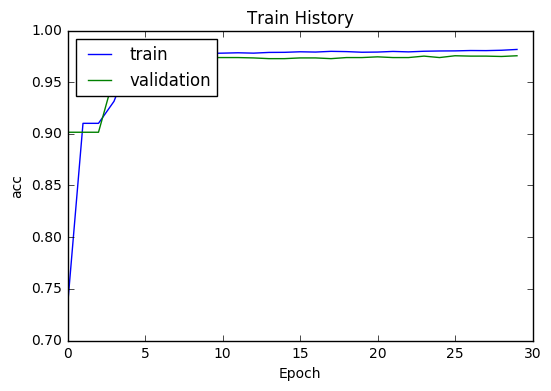

In [54]:
show_train_history(train_history,'acc','val_acc')

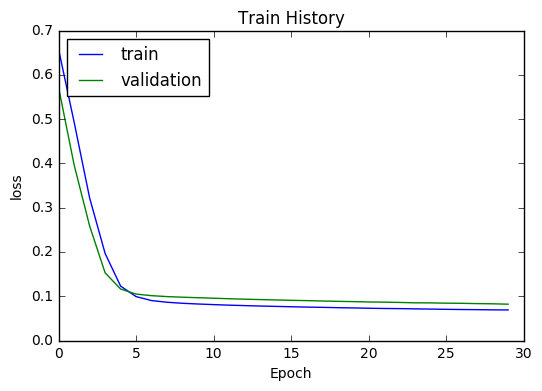

In [55]:
show_train_history(train_history,'loss','val_loss')

In [56]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3580/3580 [==============================] - 1s 166us/step


In [57]:
scores[1]

0.9790502794628037